<a href="https://colab.research.google.com/github/Schefflera-Arboricola/Stuff/blob/main/Projects%20and%20Simulation/Social%20Computing%20models/Cascading_in_a_network(week_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

In [ ]:
def make_gml_file():
  G=nx.erdos_renyi_graph(10,0.5)
  nx.write_gml(G,"random_graph.gml")
make_gml_file()

#1. increasing the payoff

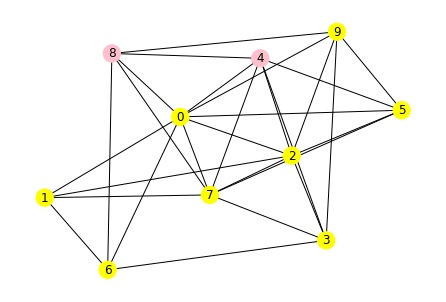

In [ ]:
def set_action(g,l):
  '''sets action of all nodes's action to B and nodes in l to action A'''
  for i in g.nodes(): g.nodes()[i]["action"]="B"
  for i in l: g.nodes()[str(i)]["action"]="A"
  return g

def get_color(g):
  #color code based on action
  l=[]
  for i in g.nodes():
    if g.nodes()[i]["action"]=="B" : l+=['yellow']
    else: l+=['pink']
  return l


G=nx.read_gml("random_graph.gml")
l=random.sample(list(G.nodes()),2)
G=set_action(G,l)
nx.draw(G,with_labels=True,node_color=get_color(G))


complete cascade


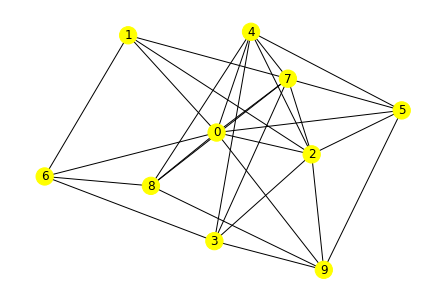

In [ ]:
def decide(g,payoffA,payoffB):
  #implements 1 iteration of and returns dictionary of new actions
  action_dic={}
  for i in g.nodes():
    A,B=neighbor_action(g,i)
    pfA,pfB=payoffA*len(A),payoffB*len(B)
    #print(pfA,pfB,i)
    if pfA>=pfB: action_dic[i]='A'
    else: action_dic[i]='B'
  return action_dic

def neighbor_action(g,node):
  #returns 2 lists of neighbors of 'node' based on their actions : A and B
  lA,lB=[],[]
  for i in g.neighbors(node):
    if g.nodes()[i]["action"]=="B" : lB+=[i]
    else: lA+=[i]
  return lA,lB

def reset_action(g,action_dic):
  #set the actions of nodes based on the dictionary action_dic
  for i in g.nodes():
    g.nodes()[i]["action"]=action_dic[i]
  return g

def get_actions(g):
  l=[]
  for i in g.nodes():
    l+=[g.nodes()[i]["action"]]
  return l


payoffA,payoffB=5,3
H=G.copy()
action_dic=decide(G,payoffA,payoffB)
G=reset_action(G,action_dic)
c=0
while get_actions(G)!=get_actions(H) or c>=20:
  H=G.copy()
  action_dic=decide(G,payoffA,payoffB)
  G=reset_action(G,action_dic)
  c+=1
if c<20 : print("complete cascade")
else: print("incomplete cascade")
nx.draw(G,with_labels=True,node_color=get_color(G))

#2. target key people

In [ ]:
def is_cascade(G,payoffA,payoffB):
  H=G.copy()
  action_dic=decide(G,payoffA,payoffB)
  G=reset_action(G,action_dic)
  c=0
  while get_actions(G)!=get_actions(H) and c<=20:
    H=G.copy()
    action_dic=decide(G,payoffA,payoffB)
    G=reset_action(G,action_dic)
    #print(c)
    c+=1
  if c<20 : return True
  else: return False

G=nx.read_gml("random_graph.gml")
payoffA,payoffB=5,3
L=[]
for i in G.nodes():
  for j in G.nodes():
    if i>j: 
      l=[i,j]
      G=set_action(G,l)
      x=is_cascade(G,payoffA,payoffB)
      #if x: 
      L+=[[i,j,get_actions(G),x]]
      #print(x)
    G=nx.read_gml("random_graph.gml")

for i in L:print(i)


['1', '0', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['2', '0', ['A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], False]
['2', '1', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['3', '0', ['B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'B'], False]
['3', '1', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['3', '2', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['4', '0', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['4', '1', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['4', '2', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['4', '3', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['5', '0', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['5', '1', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['5', '2', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['5', '3', ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], True]
['5', '4', ['B', 'B', 'B', 'B', 

#3. Impact of Communities on Cascades

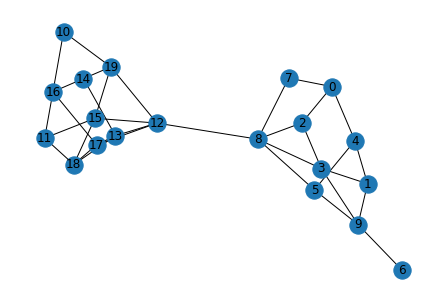

In [ ]:
#making 2 communities

def make_2_comm_graph(n,p=0.5): 
  g=nx.Graph()
  for i in range(n//2):
    for j in range(n//2):
      if i<j and random.random()<=p: g.add_edge(i,j)
  
  for i in range(n//2,n):
    for j in range(n//2,n):
      if i<j and random.random()<=p: g.add_edge(i,j)
  
  a,b=random.choice(list(range(n//2))),random.choice(list(range(n//2,n)))
  g.add_edge(a,b)
  
  return g



n,p=20,0.5
G=make_2_comm_graph(n,p)
nx.write_gml(G,"random_graph_community.gml")
nx.draw(G,with_labels=True)

True


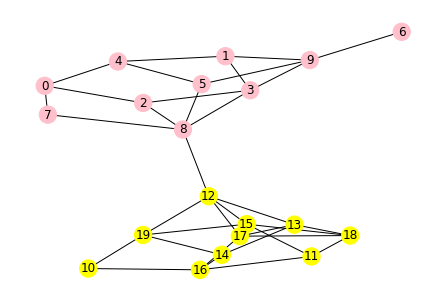

In [ ]:
def get_color(g):
  #color code based on action
  l=[]
  for i in g.nodes():
    if g.nodes()[i]["action"]=="B" : l+=['yellow']
    else: l+=['pink']
  return l

G=nx.read_gml("random_graph_community.gml")
payoffA,payoffB=8,3
l=random.sample(list(range(0,10)),2)
#print(l)

for i in G.nodes(): 
  if int(i) in l: 
    G.nodes()[i]["action"]="A"
  else : G.nodes()[i]["action"]="B"
#nx.draw(G,with_labels=True,node_color=get_color(G))
x=is_cascade(G,payoffA,payoffB)
print(x)
nx.draw(G,with_labels=True,node_color=get_color(G))

#4. Cascades and Cluster of density 1-q theorem


```
if payoffA=3 and payoffB=2 ,
then q=2/(2+3) = 0.4
```
 

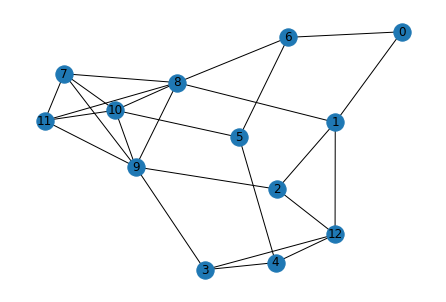

In [ ]:
def make_the_Graph():
  G=nx.Graph()
  G.add_edges_from([(0,1),(0,6), (1,2), (1,8), (1, 12), (2,9), (2,12), (3,4), (3,9), (3,12), (4,5),(4,12), (5,6), (5, 10), (6,8), (7,8), (7,9), (7,10), (7,11), (8,9), (8,10), (8,11), (9,10), (9,11), (10, 11)])
  return G

G=make_the_Graph()
nx.draw(G,with_labels=True)

False


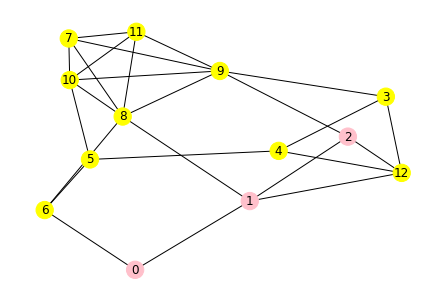

In [ ]:
def iterate(l):
  for i in G.nodes(): 
    if int(i) in l: 
      G.nodes()[i]["action"]="A"
    else : G.nodes()[i]["action"]="B"

  payoffA,payoffB=3,2
  x=is_cascade(G,payoffA,payoffB)
  print(x)
  nx.draw(G,with_labels=True,node_color=get_color(G))

L=[[0,1,2,3], [0,2,3,4],[1,2,3,4], [2,3,4,5], [3,4,5,6], [4,5,6,12],[2,3,4,12], [0,1,2,3,4,5], [0,1,2,3,4,5,6,12]]
iterate(L[0])

True


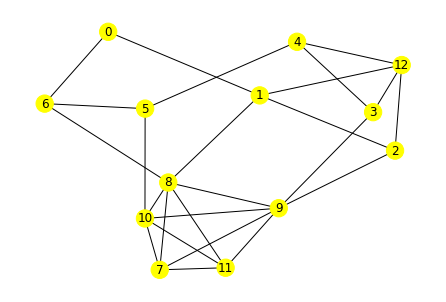

In [ ]:
iterate(L[1])

True


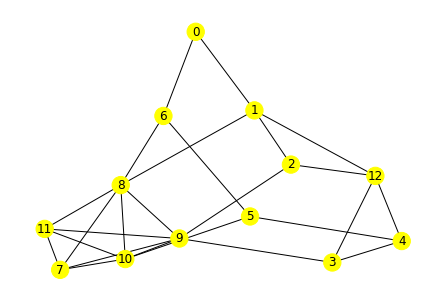

In [ ]:
iterate(L[2])

True


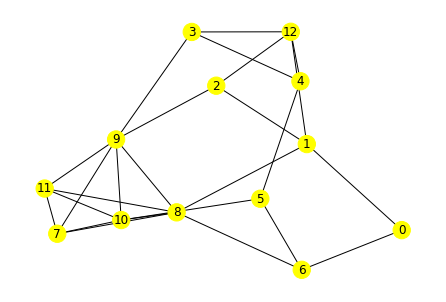

In [ ]:
iterate(L[3])

False


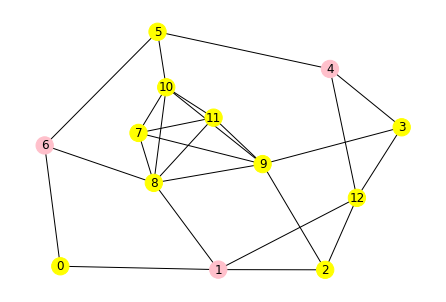

In [ ]:
iterate(L[4])

True


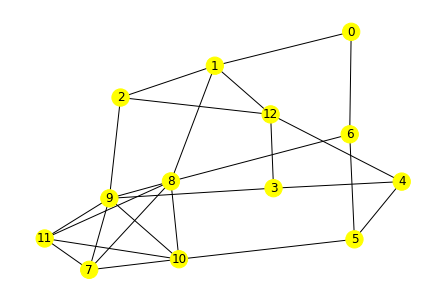

In [ ]:
iterate(L[5])

False


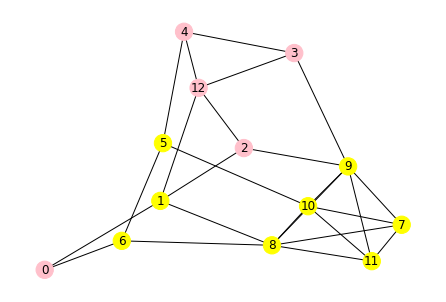

In [ ]:
iterate(L[6])

False


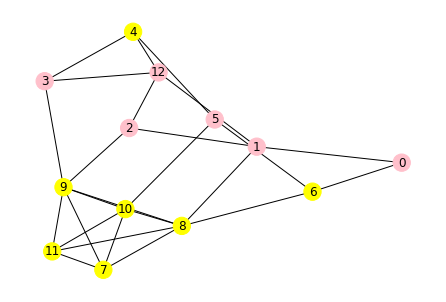

In [ ]:
iterate(L[7])

True


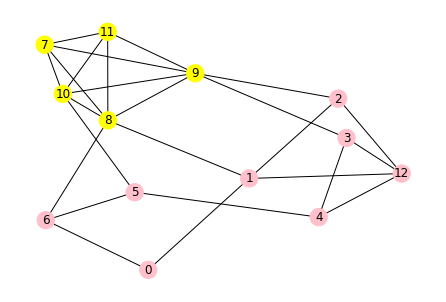

In [ ]:
iterate(L[8])